In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv('/Users/sammarcustaylor/Desktop/Marketing_Raw_Data.csv')

In [4]:
raw_data

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46,34,11,11,2020,Monday,707,465,651.375000,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250000,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375000,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750000,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500000,No Promo
...,...,...,...,...,...,...,...,...,...,...,...
177,05/05/2021,19,60,5,17,2021,Wednesday,1400,7284,1119.600000,No Promo
178,06/05/2021,19,60,5,17,2021,Thursday,2244,13021,2067.888889,Promotion Red
179,07/05/2021,19,60,5,17,2021,Friday,2023,4587,1450.200000,No Promo
180,08/05/2021,19,60,5,17,2021,Saturday,1483,5927,1121.875000,No Promo


# Line Graph

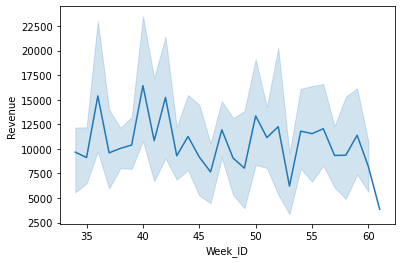

In [7]:
# investigate revenue by date

ax = sns.lineplot(x = 'Week_ID', y = 'Revenue', data = raw_data);

# error bands show the confidence interval. 

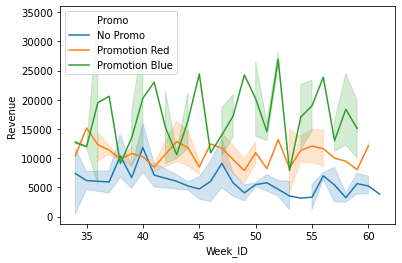

In [9]:
# example 2 - adding categories
ax = sns.lineplot(x = 'Week_ID', y = 'Revenue', data = raw_data, hue = 'Promo');

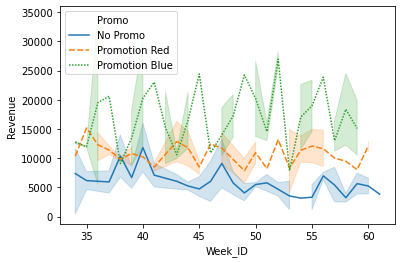

In [10]:
# change style of lines by promo. 

ax = sns.lineplot(x = 'Week_ID', y = 'Revenue', data = raw_data, hue = 'Promo', style = 'Promo');

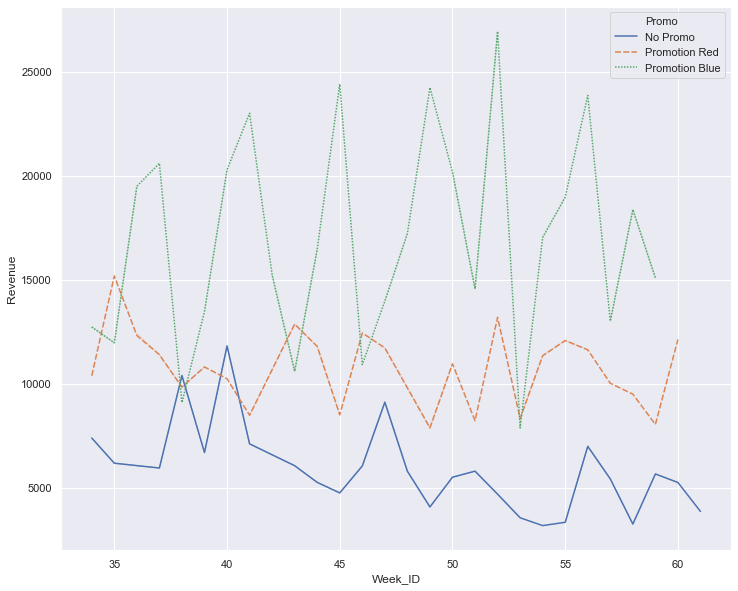

In [13]:
# example 4 - By promo with style, increase the size and remove the ci

# increase size
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.lineplot(x = 'Week_ID', y = 'Revenue', data = raw_data, hue = 'Promo', style = 'Promo', ci=False);

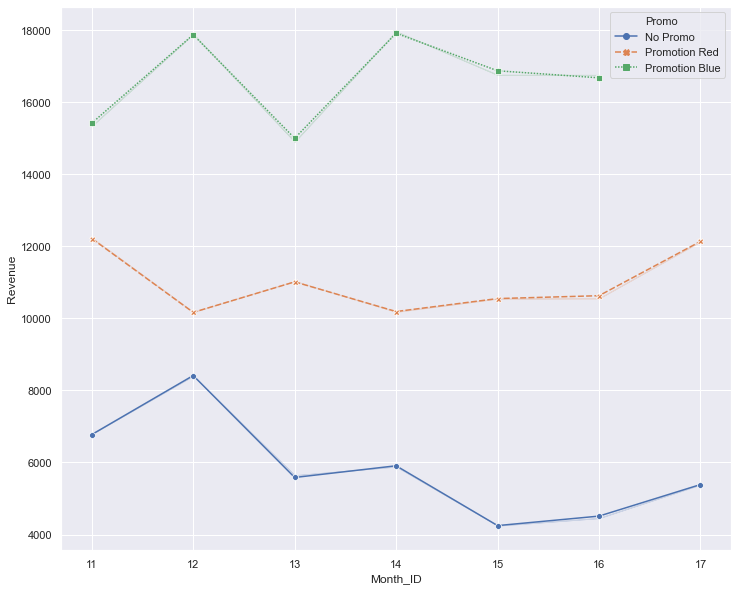

In [18]:
# Example 5 - By promo with style & increase the size & remove CI & adding markers & by month

ax = sns.lineplot(x = 'Month_ID', y = 'Revenue', data = raw_data, hue = 'Promo', style = 'Promo', ci = False, markers = True);

# Barplot

,Revenue
Month_ID,
11,247620
12,361702
13,297244
14,299149
15,327216
16,324195
17,68724


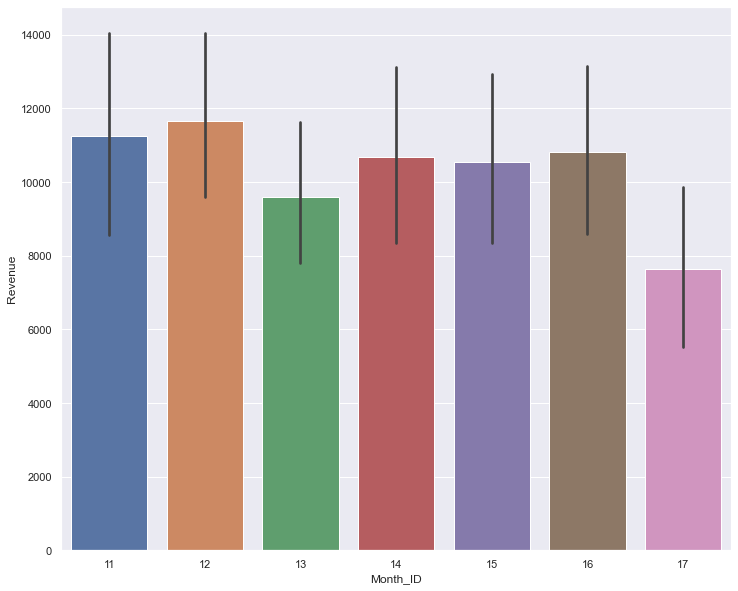

In [22]:
ax = sns.barplot(x = 'Month_ID', y = 'Revenue', data = raw_data)

# Notes
# the lines signify the confidence interval
# takes mean by default, if we wanted to display a dataframe that is the sum of the month, we would have to create a 
# new frame as shown below. 

# create a df with the mean values

raw_data[['Revenue', 'Month_ID']].groupby('Month_ID').agg({'Revenue': 'sum'})

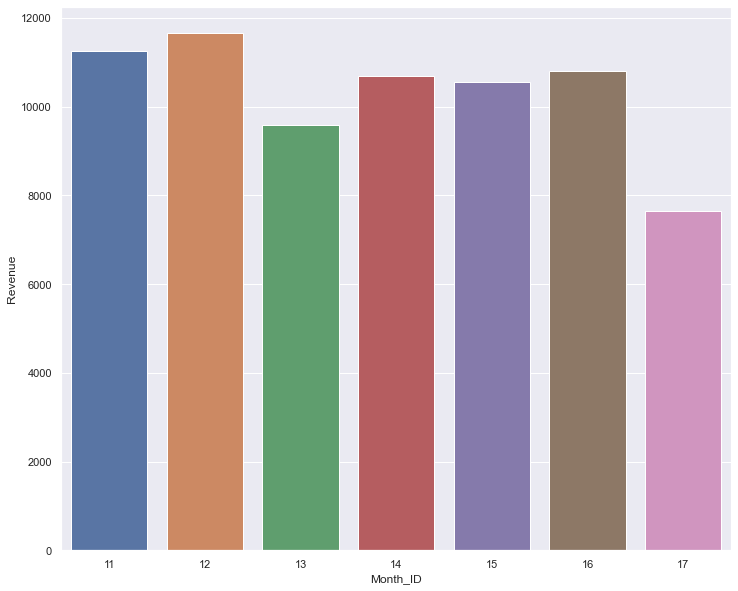

In [23]:
# no confidence interval

ax = sns.barplot(x = 'Month_ID', y = 'Revenue', data = raw_data, ci = False)

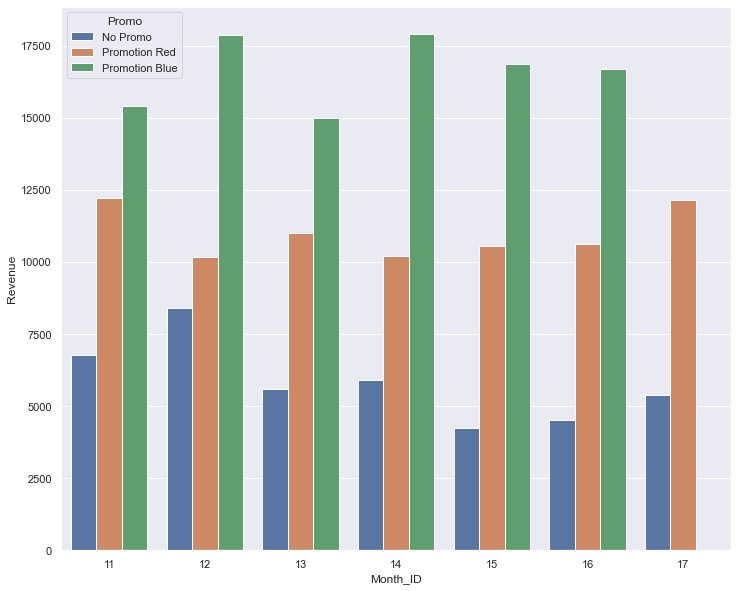

In [26]:
# Total revenue by month - by promo - avg/month

ax = sns.barplot(x = 'Month_ID', y = 'Revenue', data = raw_data, ci = False, hue = 'Promo')

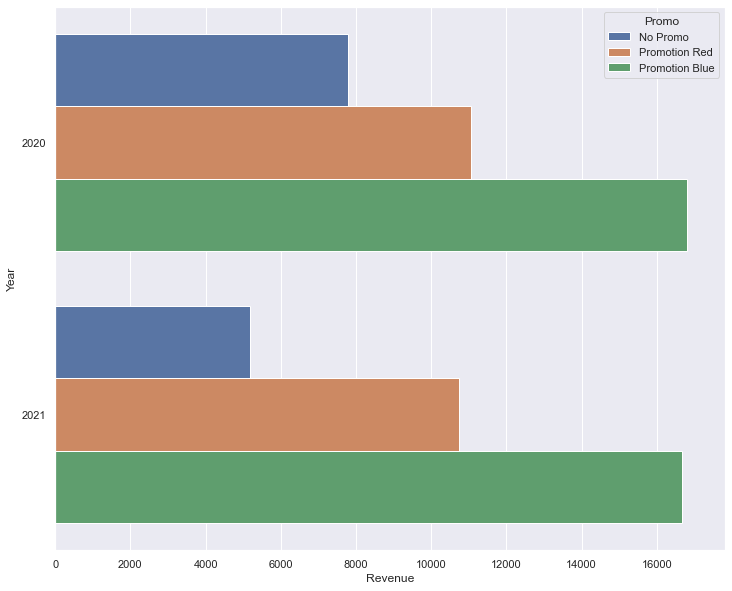

In [28]:
# Revenue by year with hue based on promotion spend

ax = sns.barplot(x = 'Revenue', y = 'Year', data = raw_data, ci = False, hue = 'Promo', orient = 'h')

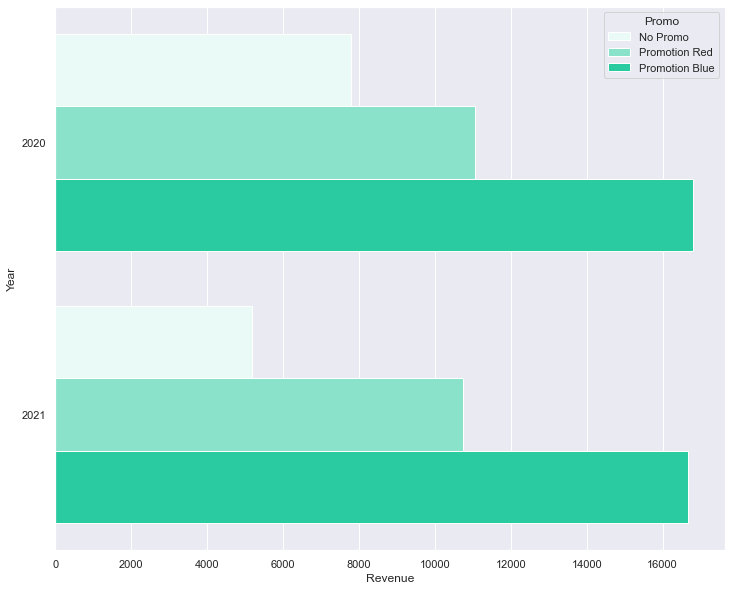

In [30]:
ax = sns.barplot(x = 'Revenue', y = 'Year', data = raw_data, ci = False, hue = 'Promo', orient = 'h', color = '#11E5AD')

# cool way to pick colors by hex number
# https://htmlcolorcodes.com/color-picker/

# Histograms

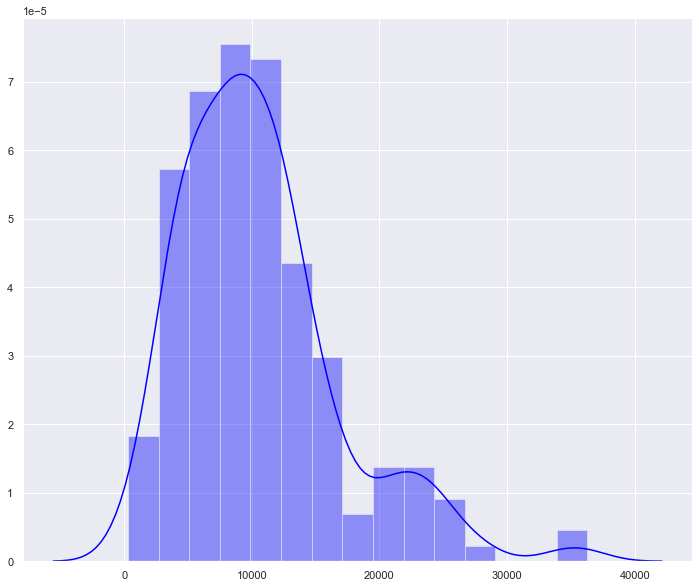

In [37]:
# Example 1 - investigating the distribution of revenue

x = raw_data['Revenue'].values

sns.distplot(x, color = 'blue');

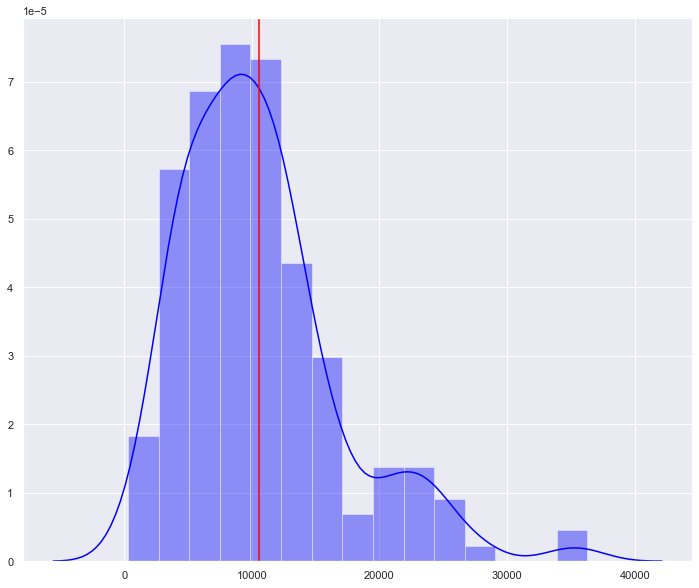

In [40]:
#Investigating the distribution of revenue, adding the mean

mean = raw_data['Revenue'].mean()

sns.distplot(x, color = 'blue')

# 0, 1 is y axis
plt.axvline(mean,0,1, color = 'red')

# this is a right skewed distribution because the mean is to the right. 

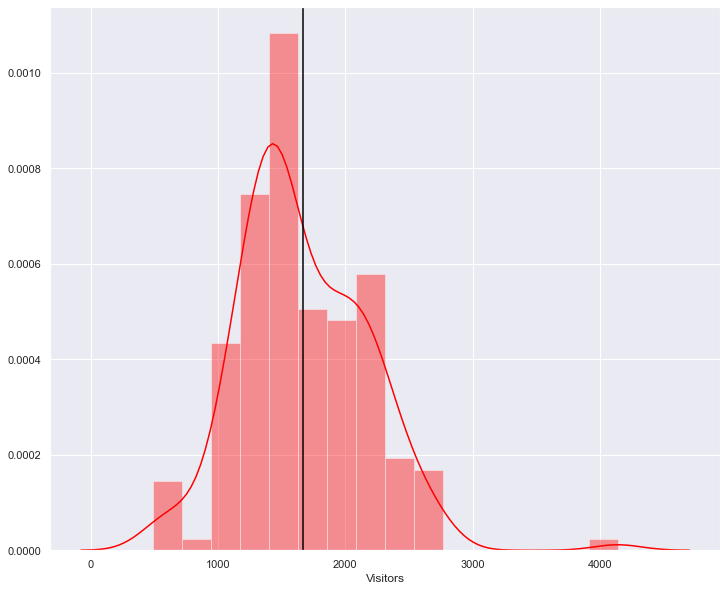

In [43]:
# Investigate the distribution of visitors, adding the mean

v = raw_data['Visitors']

# Calculate the mean
mean = raw_data['Visitors'].mean()
mean

sns.distplot(v, color = 'red')

# plotting the mean
plt.axvline(mean,0,1,color = 'black');

# Box Plots

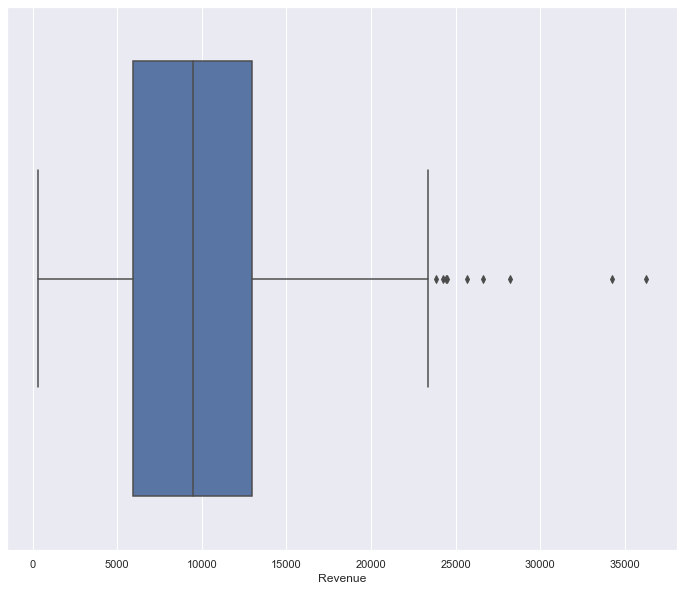

In [44]:
x = raw_data['Revenue']

sns.boxplot(x)

# Notes
# Line signifies the median
# The box shows 25th-75th percentile
# Whiskers show the minimum and maximum quartile
# Dots are outliers. 

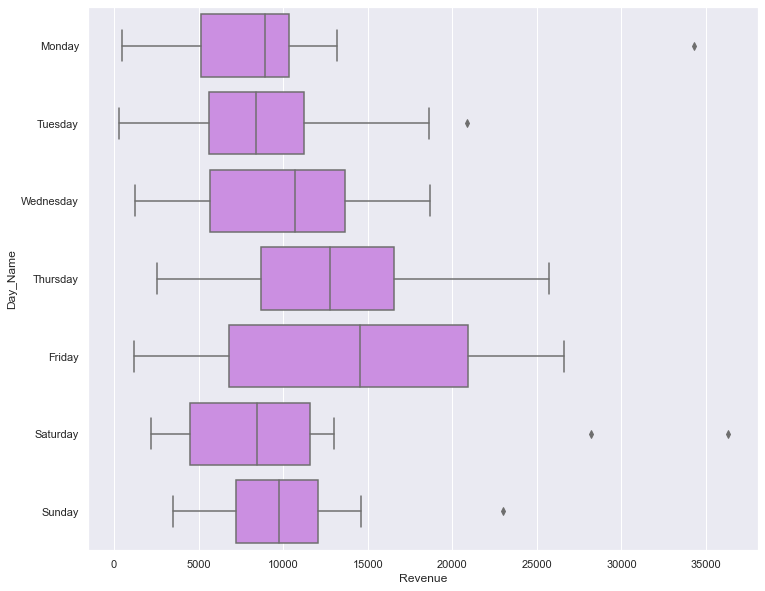

In [50]:
# Change the plot to horizontal - change color

ax = sns.boxplot(x = 'Revenue', y= 'Day_Name', data = raw_data, color = '#D181ef')

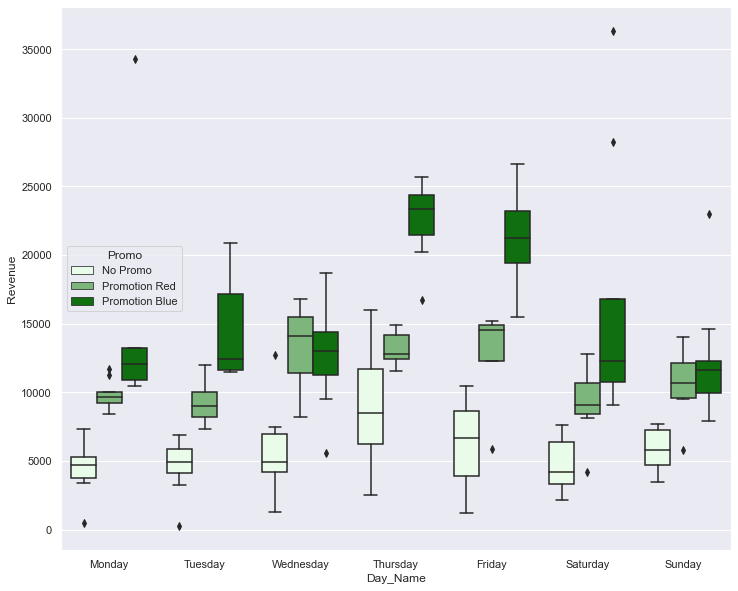

In [55]:
# investigating the distribution of revenue by day - changing color - adding hue 

ax = sns.boxplot(x = 'Day_Name', y= 'Revenue', data = raw_data, color = 'green', hue = 'Promo')

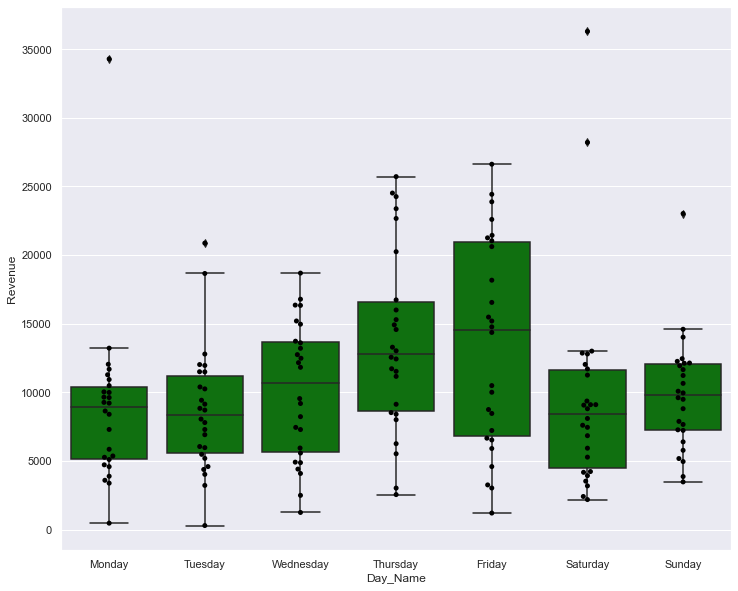

In [59]:
# Investigate the distribution of Revenue by day - by color - by data points (swarmplot)

ax = sns.boxplot(x = 'Day_Name', y= 'Revenue', data = raw_data, color = 'green')
ax = sns.swarmplot(x = 'Day_Name', y= 'Revenue', data = raw_data, color = 'black')

# Scatterplots

In [60]:
# df columns

raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

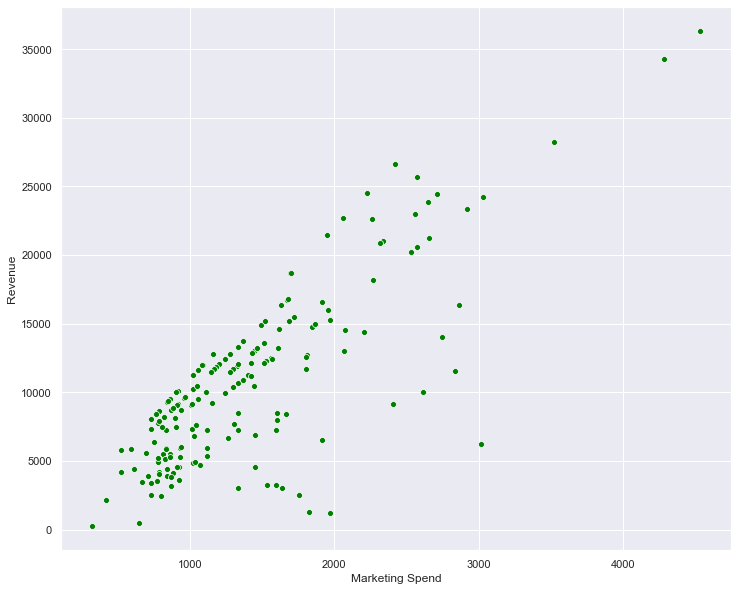

In [62]:
# relationship between marketing spend & revenue
ax = sns.scatterplot(x = 'Marketing Spend', y= 'Revenue', data = raw_data, color = 'green')

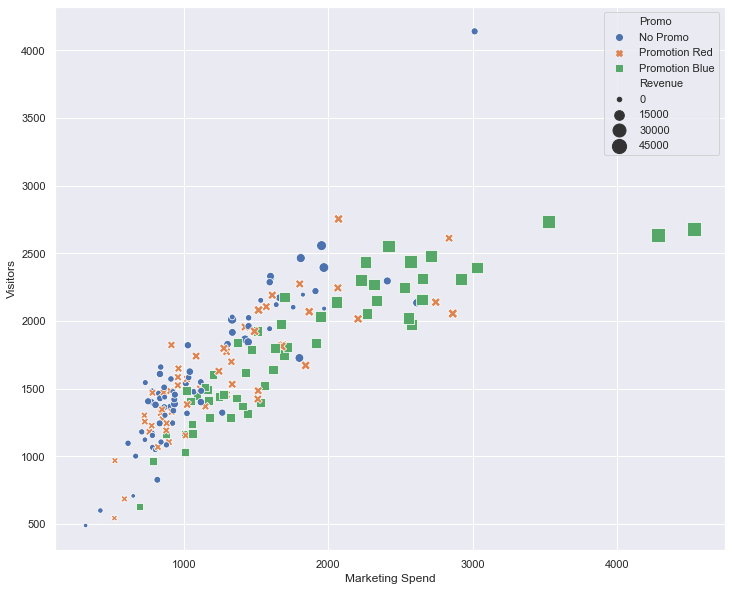

In [66]:
# change color, hue, & style
# size is based off of revenue

ax = sns.scatterplot(x = 'Marketing Spend', y= 'Visitors', data = raw_data, hue = 'Promo', style = 'Promo', size = 'Revenue',
                    sizes = (20,200))

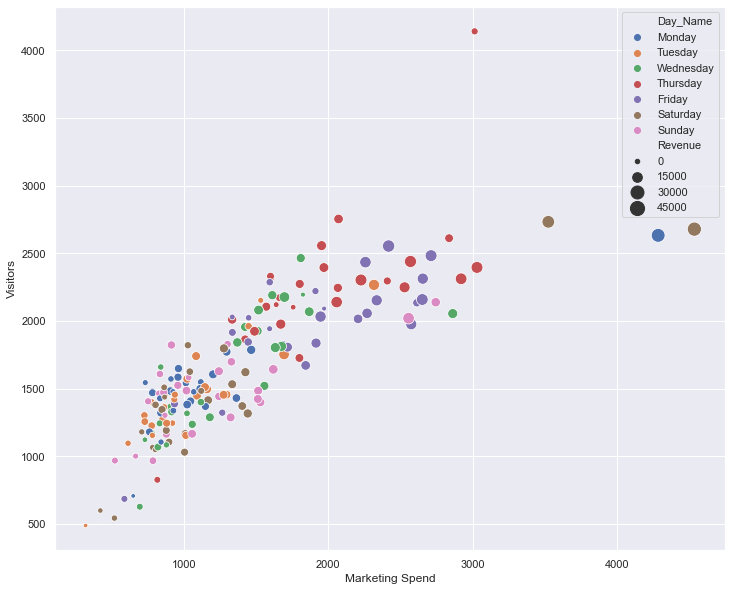

In [71]:
# changing hue to day 

ax = sns.scatterplot(x = 'Marketing Spend', y= 'Visitors', data = raw_data, hue = 'Day_Name', size = 'Revenue',
                    sizes = (20,200))

# lmPlots

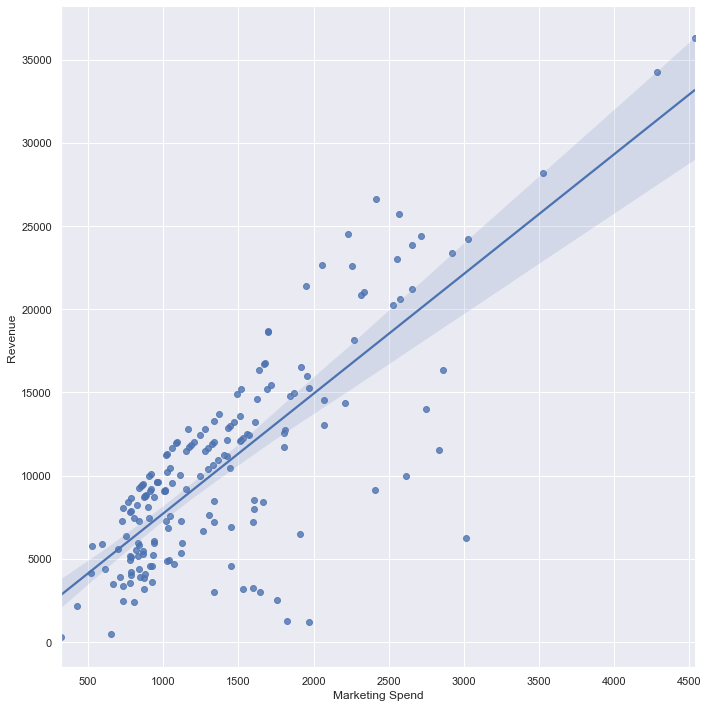

In [73]:
# Relationship between Marketing Spend and Revenue 

ax = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, height = 10)

# displays a linear model based off the relationship of two continuous variables. 

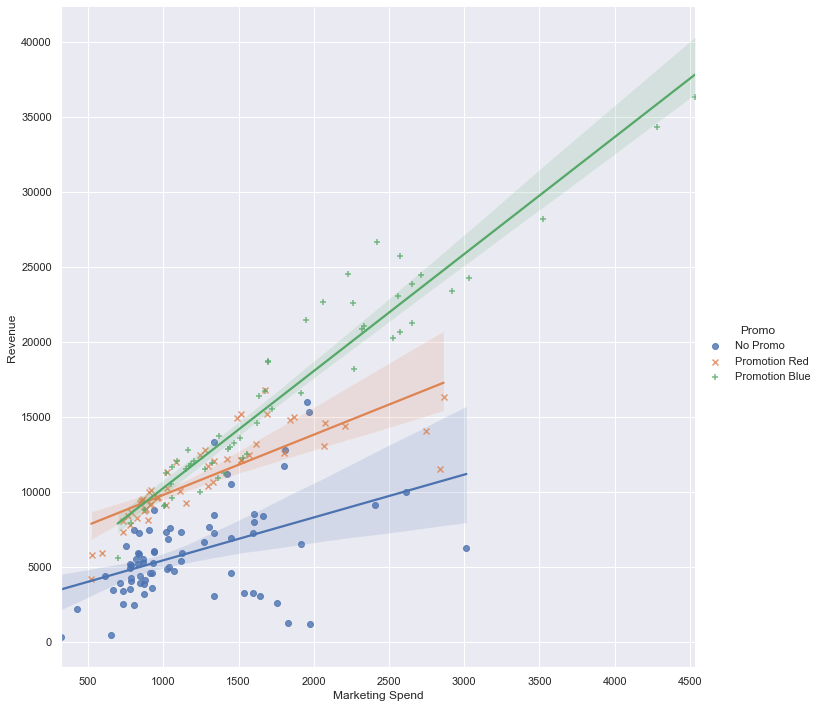

In [77]:
# breaks the relationships up one by one based on type of promo. 
# In this way we can see the continuous relationship between marketing spend & revenue.

ax = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, height = 10, hue = 'Promo', markers = ['o', 'x', '+'])

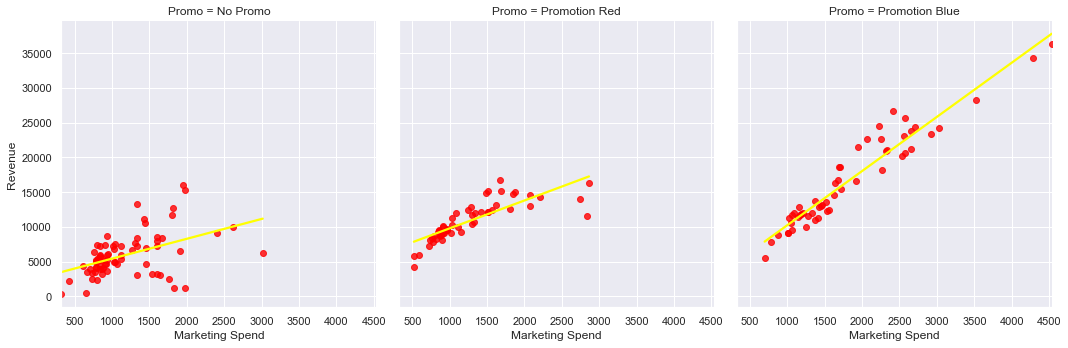

In [81]:
# Relationship between Marketing Spend & Revenue - by column
# Same plot as above but broken down into seperate graphs. 

ax = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, height = 5, col = 'Promo', ci = None,
               line_kws = {'color' : 'yellow'},
               scatter_kws = {'color' :'red'})

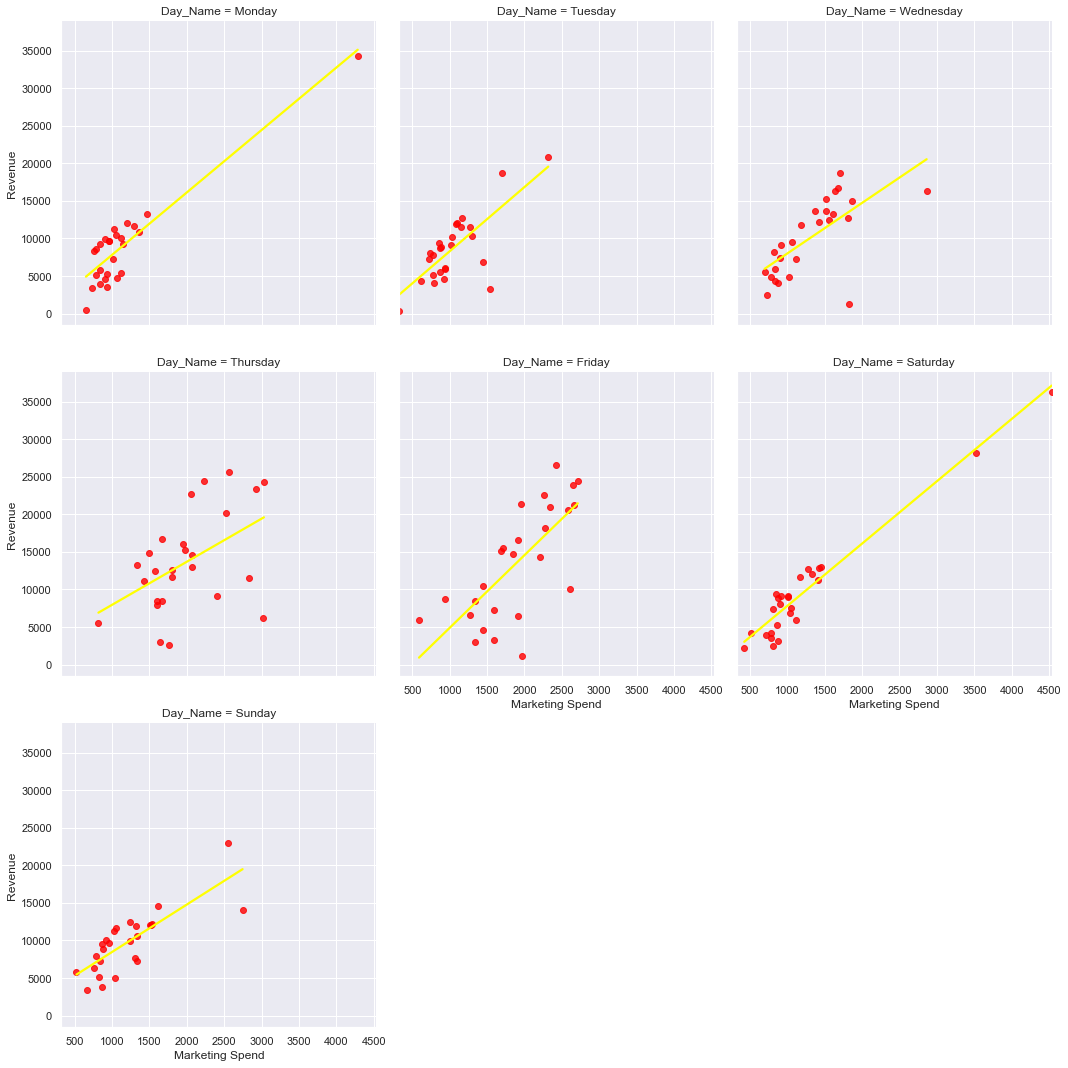

In [83]:
# investigate by column wrap, and jitter

ax = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, height = 5, col = 'Day_Name', ci = None,
               line_kws = {'color' : 'yellow'},
               scatter_kws = {'color' :'red'}, 
               col_wrap = 3)

# SubPlots

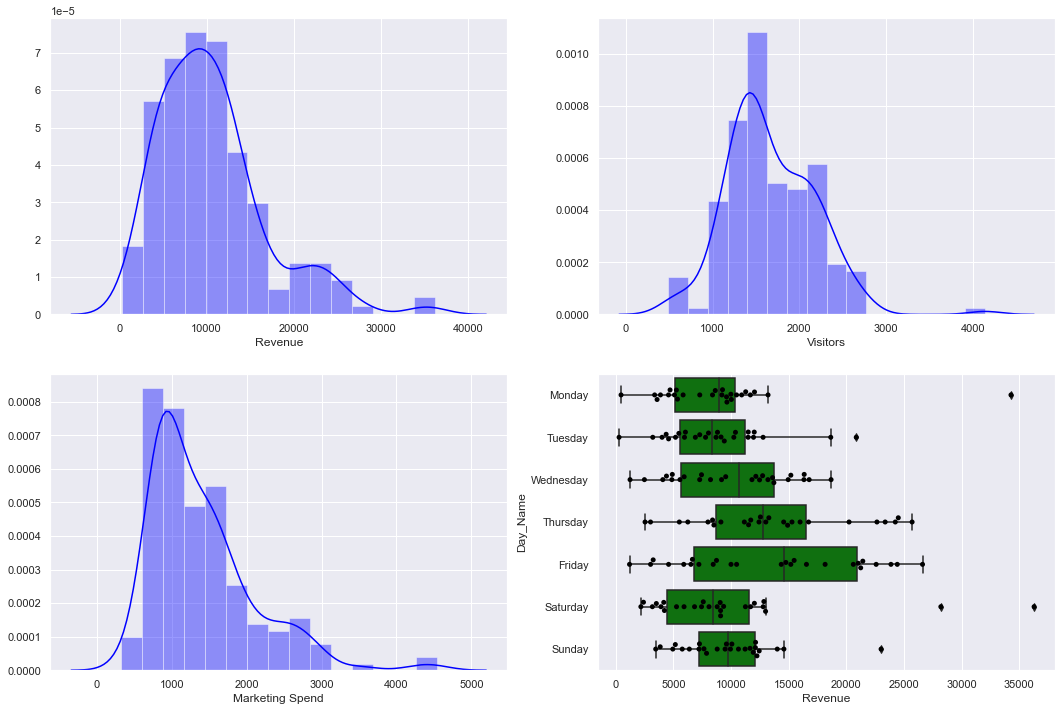

In [95]:
#Set up the matplotlib figure

fig, axis = plt.subplots(2,2, figsize = (18,12))



a = raw_data['Revenue']
b = raw_data['Visitors']
c = raw_data['Marketing Spend']

# plot 1
sns.distplot(a, color = 'blue', ax = axis[0,0])

# plot 2
sns.distplot(b, color = 'blue', ax = axis[0,1])

# plot 3
sns.distplot(c, color = 'blue', ax = axis[1,0])

# plot 4
ax = sns.boxplot(x = 'Revenue', y= 'Day_Name', data = raw_data, color = 'green')
ax = sns.swarmplot(x = 'Revenue', y= 'Day_Name', data = raw_data, color = 'black')

# Pairplots

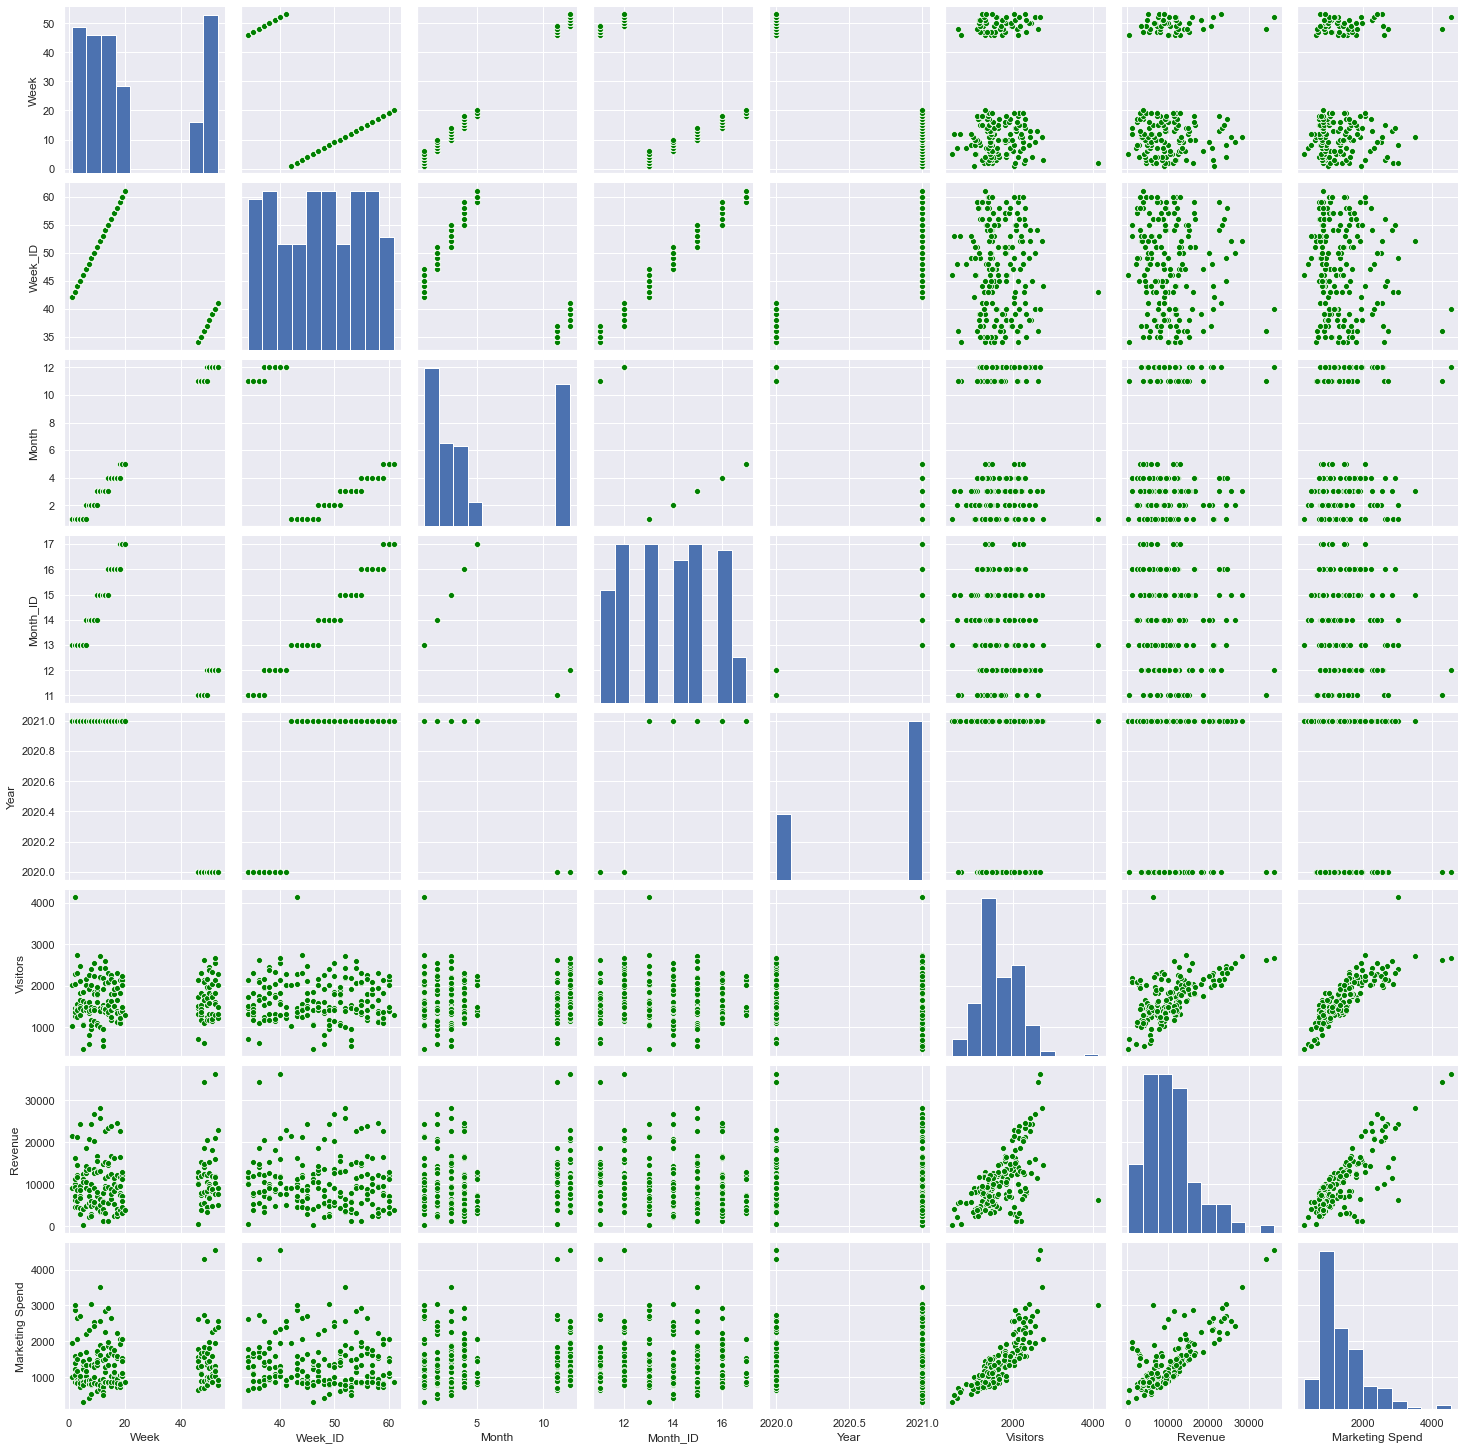

In [97]:
g = sns.pairplot(raw_data, plot_kws={'color':'green'})

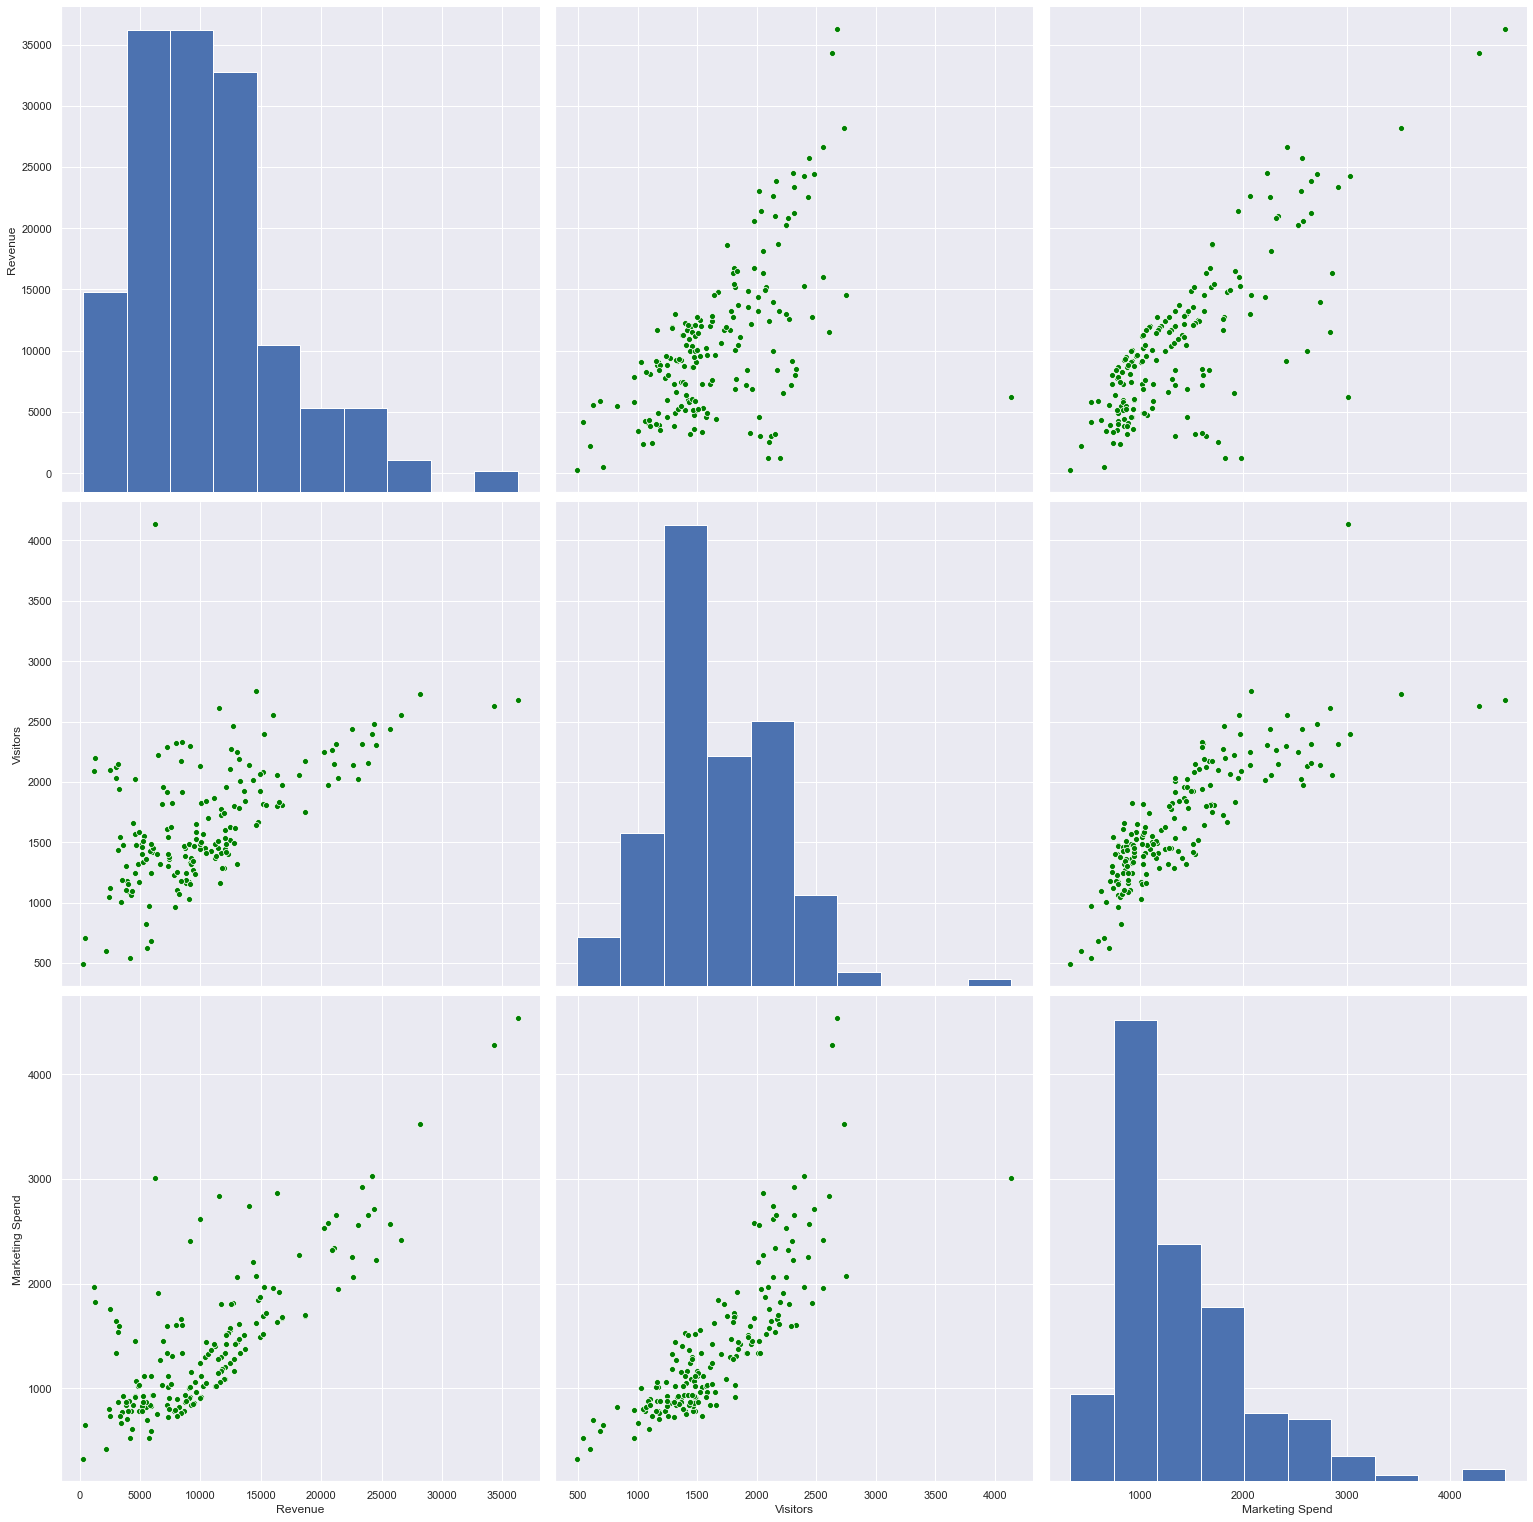

In [100]:
# re-running with relevant features

g = sns.pairplot(raw_data[['Revenue', 'Visitors', 'Marketing Spend']], plot_kws={'color':'green'}, height = 7)

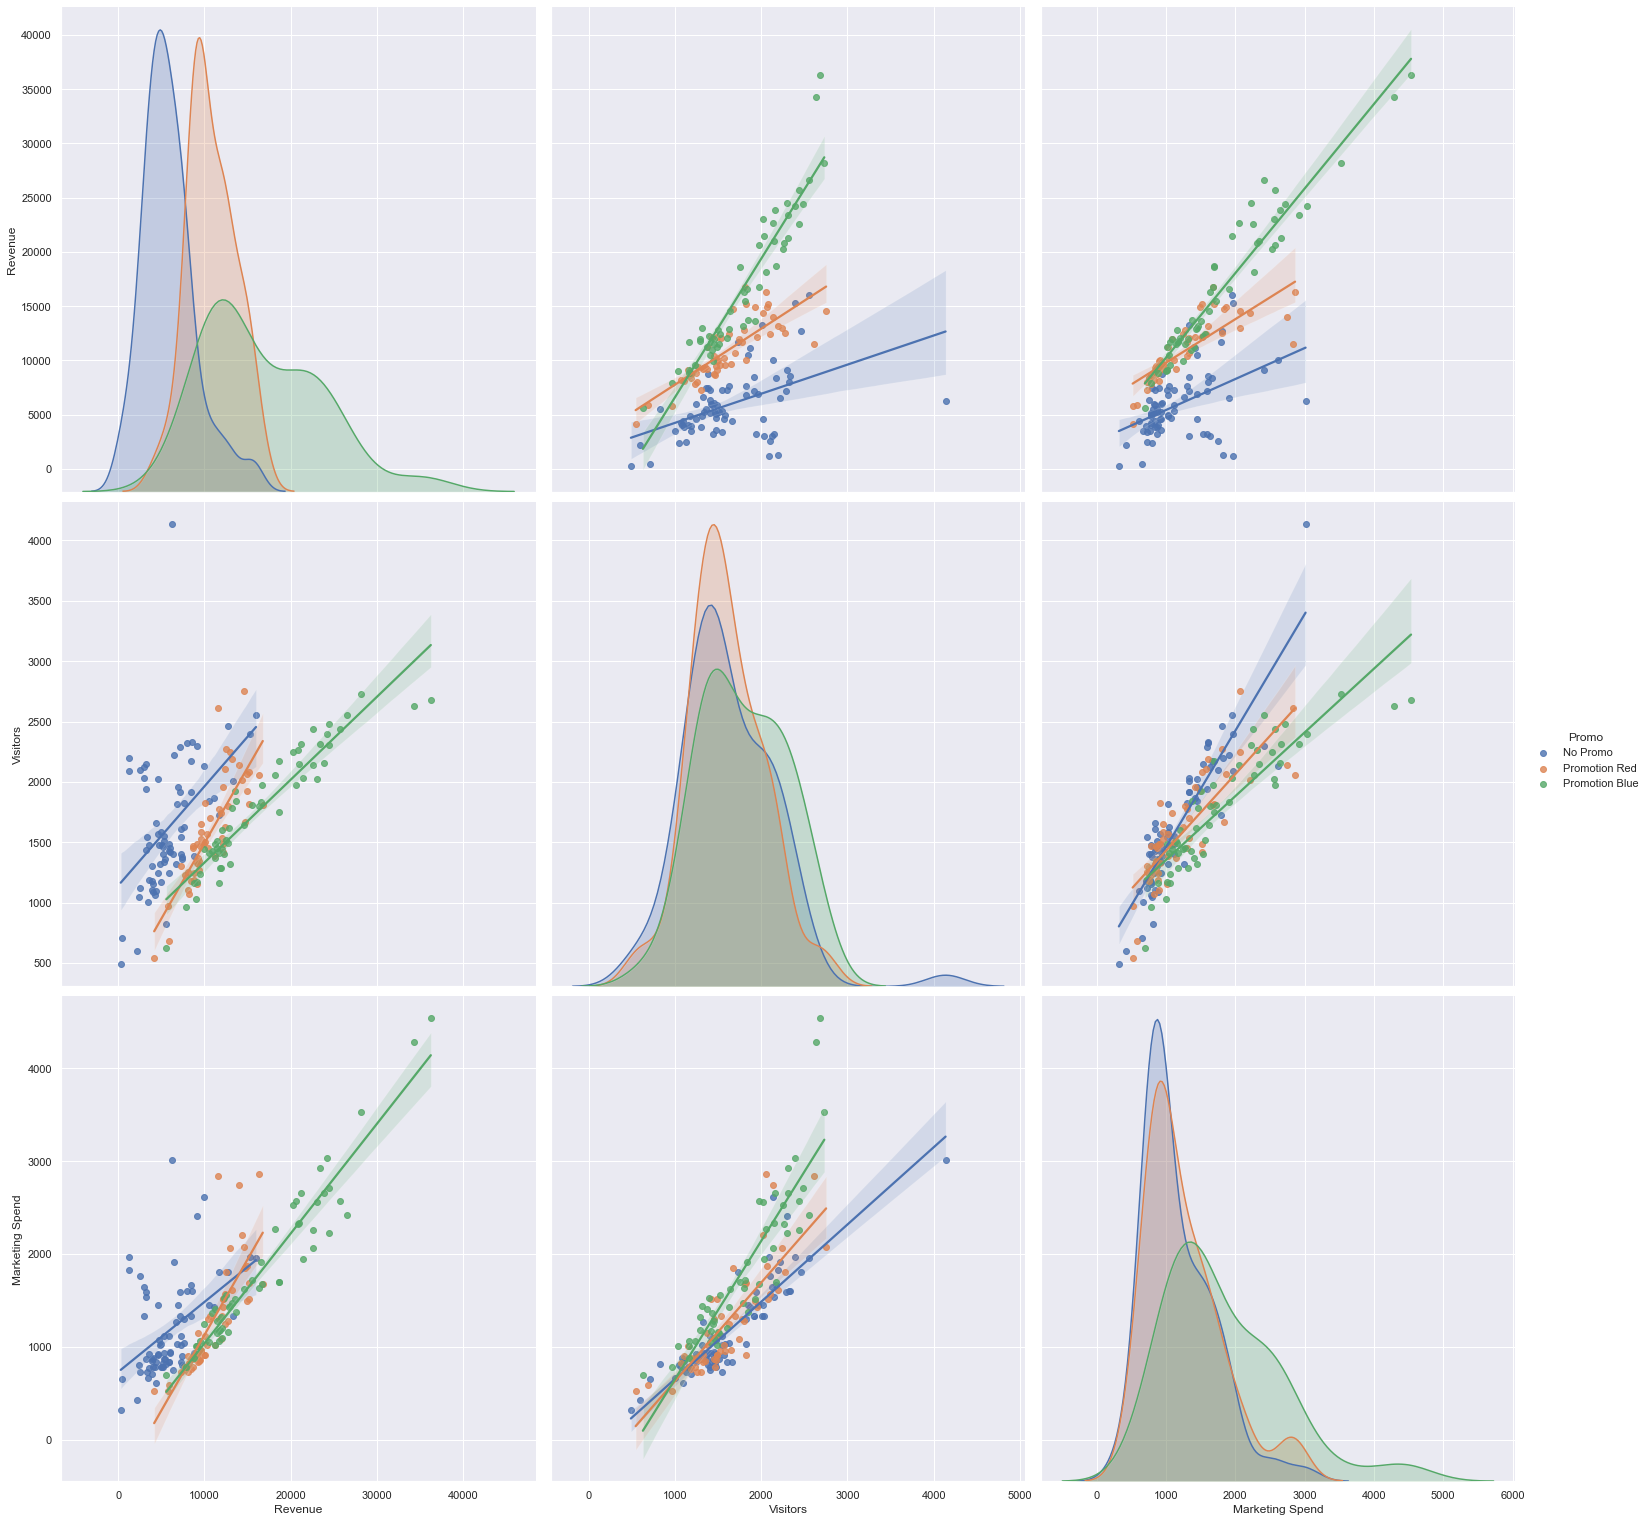

In [104]:
# add in promo as a hue, and add in regression lines for each. 

g = sns.pairplot(raw_data[['Revenue', 'Visitors', 'Marketing Spend', 'Promo']], height = 7, hue = 'Promo', kind = 'reg')

# Joint Plots

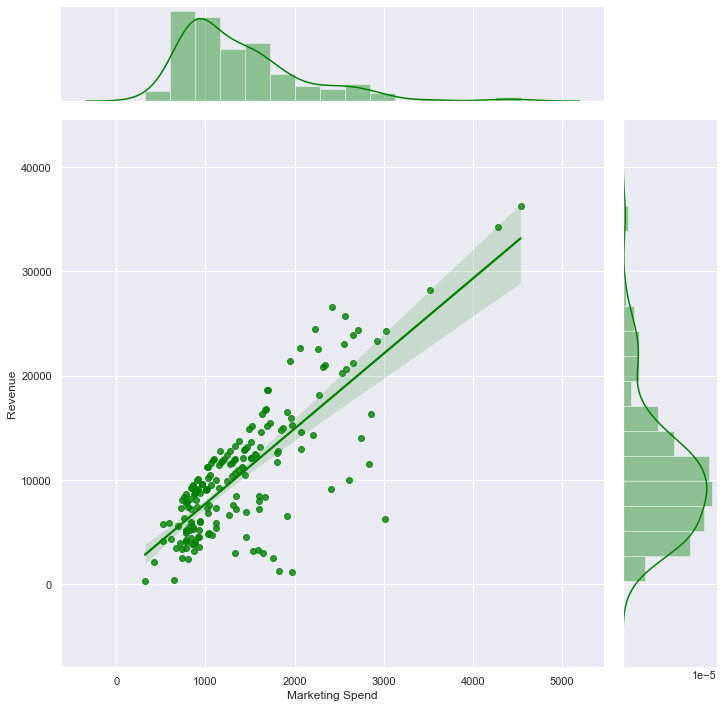

In [111]:
ax = sns.jointplot('Marketing Spend', 'Revenue', data =raw_data, color = 'green', height = 10, kind = 'reg')

# provides scatterplot relationshipo of revenue and marketing spend. 
# In addition it provides the distribution of each variable.

# Heat Map

In [113]:
pc = raw_data[['Revenue', 'Visitors', 'Marketing Spend', 'Promo']].corr()

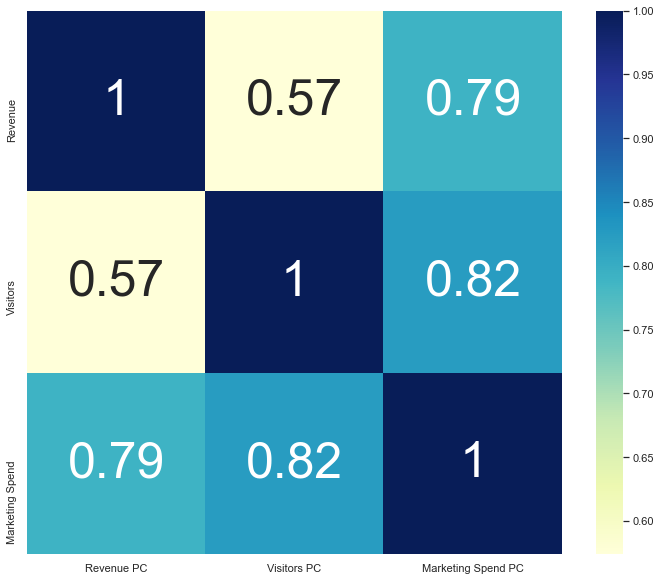

In [123]:
col = ['Revenue PC', 'Visitors PC', 'Marketing Spend PC']

hm = sns.heatmap(pc, annot = True, 
                 annot_kws = {'size': 50}, 
                 xticklabels = col,
                 cmap = 'YlGnBu' )